From the power point we have seen that the logistic equation is, 

$$ \hat{y} = \frac{1}{1 + e^{-(mx+b)}} $$

let $z = mx+b $ 

The loss function for logistic regression is

$ L = \sum( -y_i log(\hat{y_i}) - (1 - y_i) log(1 - \hat{y_i}) )$

the update equation for $m$ and $b$ with $\epsilon$ as a learning rate are:

$m = m - \epsilon \frac{\partial L}{\partial m} $

$b = b - \epsilon \frac{\partial L}{\partial b} $

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(df.shape)

(891, 12)


In [5]:
df["family_size"] = df["SibSp"] + df["Parch"] + 1

In [6]:
print(df["Parch"].head())
print("+++++++++++++")
print(df["SibSp"].head())

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64
+++++++++++++
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


In [7]:
print(df["family_size"].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [8]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [9]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64


In [10]:
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64

In [11]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
df["Embarked"].fillna(value="S", inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
family_size      0
dtype: int64

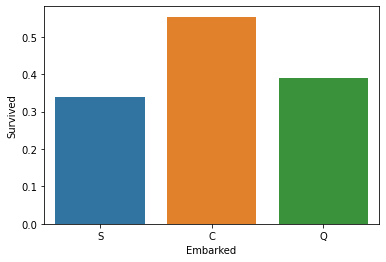

In [13]:
sns.barplot('Embarked', 'Survived', data=df, ci=None)
plt.show()

1    112
0     97
Name: Survived, dtype: int64
1    0.535885
0    0.464115
Name: Survived, dtype: float64
Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


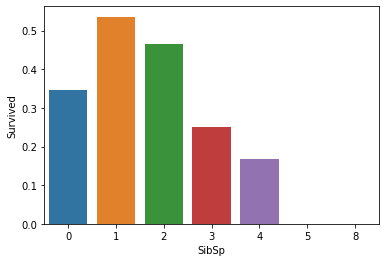

In [14]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df, ci=None)


print(df["Survived"][df["SibSp"] == 1].value_counts())
print(df["Survived"][df["SibSp"] == 1].value_counts(normalize = True))

print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

0    374
1    163
Name: Survived, dtype: int64
0    0.696462
1    0.303538
Name: Survived, dtype: float64
1    89
0    72
Name: Survived, dtype: int64
1    0.552795
0    0.447205
Name: Survived, dtype: float64
Percentage of family_size = 1 who survived: 30.353817504655495
Percentage of family_size = 2 who survived: 55.27950310559007
Percentage of family_size = 3 who survived: 57.84313725490197


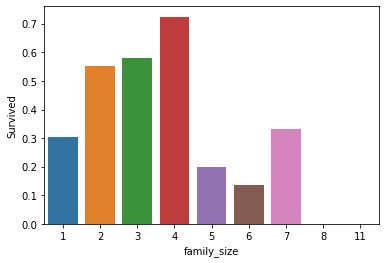

In [15]:
#draw a bar plot for family_size vs. survival

sns.barplot(x="family_size", y="Survived", data=df, ci=None)

print(df["Survived"][df["family_size"] == 1].value_counts())
print(df["Survived"][df["family_size"] == 1].value_counts(normalize = True))

print(df["Survived"][df["family_size"] == 2].value_counts())
print(df["Survived"][df["family_size"] == 2].value_counts(normalize = True))
#I won't be printing individual percent values for all of these.
print("Percentage of family_size = 1 who survived:", df["Survived"][df["family_size"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of family_size = 2 who survived:", df["Survived"][df["family_size"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of family_size = 3 who survived:", df["Survived"][df["family_size"] == 3].value_counts(normalize = True)[1]*100)

In [16]:
embarked ={"S":0, "C":1, "Q":2}

In [17]:
df.Embarked = [embarked[item] for item in df.Embarked]

In [18]:
gender = {"female":1, "male":0}

In [19]:
df.Gender = [gender[item] for item in df.Gender]

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


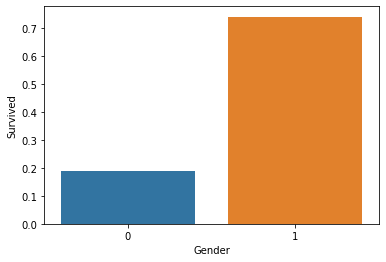

In [20]:
#draw a bar plot of survival by Gender
sns.barplot(x="Gender", y="Survived", data=df, ci=None)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Gender"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Gender"] == 0].value_counts(normalize = True)[1]*100)

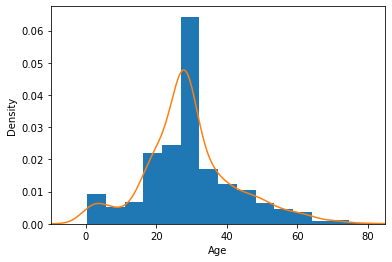

In [21]:
ax = df["Age"].hist(bins=15, density=True, stacked=True)
df["Age"].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

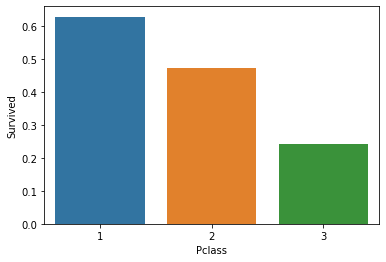

In [22]:
sns.barplot('Pclass', 'Survived', data=df, ci=None)
plt.show()

In [23]:
dfx = df[["Age", "Gender", "family_size", "Embarked"]].copy(deep=True)
dfy = df[["Survived"]].copy(deep=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x = scaler.fit_transform(dfx)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.2, random_state=42)

In [26]:
print(x_test[0:5])

      Age  Gender  family_size  Embarked
709  28.0       0            3         1
439  31.0       0            1         0
840  20.0       0            1         0
720   6.0       1            2         0
39   14.0       1            2         1


In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [28]:
print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(712, 1)
(712,)


In [29]:
print(x_train[0:5])

      Age  Gender  family_size  Embarked
331  45.5       0            1         0
733  23.0       0            1         0
382  32.0       0            1         0
704  26.0       0            2         0
813   6.0       1            7         0


In [30]:
model.fit(x_train, y_train)

LogisticRegression(C=1)

In [31]:
print(x_test.shape)

(179, 4)


In [32]:
ypred = model.predict(x_test)

In [33]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[-0.00689113  2.57109147 -0.18793252  0.153203  ]] [-0.9838882]


In [34]:
"""
We want to supply a data point and get the probability 
since we are using 4 features which are Age, Gender, Family size and Embarked, 
let's supply 32, 1, 1, 0
"""
#import numpy as np
newx = pd.DataFrame([[32, 0, 1, 0]])
newx2 = pd.DataFrame([[32, 1, 1, 0]])
prob = model.predict(newx[0:])
prob2 = model.predict(newx2[0:])
print(prob, prob2)

[0] [1]


#### Confusion Matrix

Is a table that gives a visual representation of performance of a classification. Each row in the table represents the instances in an actual class and each column represents the instances in a predicted class. Rows and columns can be interchanged.  

<img src ="confusion_matrix.png" width = 300, height = 200>

#### False Positive is known as Type I error and False Negative is known as Type II error. 

Let's consider another matrix and compute come metrics

<img src ="confusion_matrix2.png" width = 500, height = 400>

Important metrics

Recall = Sensitivity = True Positive rate = $\frac{TP}{TP+FN}$ 

Precision = Positive Predictive Value = $\frac{TP}{TP+FP} $  

Accuracy = $ \frac{TP+TN}{TP+TN+FP+FN} $

Specificity = True Negative rate = $ \frac{TN}{FP+TN} $ 

False Positive Rate = $\frac{FP}{FP+TN} $  = 1 - TNR = 1 - Specificity  

F1 score is an harmonic mean of Recall and Precision, 
F1 = $\frac{2*Precision*Recall}{Precision+Recall} $



Receiver Operating Characteristic curve, ROC curve is computed by plotting the True Positive Rate (TPR) with False Positive Rate (FPR) for different thresholds. 

<img src ="ROC_curves.svg" width = 400, height = 300>


Area Under the Receciver Operating Characteristic Curve, AUCROC, measures the separability of classes. Area close to 1 means the classes are properly classified. AUC under 0.5 means the classification is not good. 

Images courtesy of Wiki

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[88, 17],
       [23, 51]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.78


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [33]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.76
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [34]:
from sklearn.metrics import roc_curve
b = model.predict_proba(x_test)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

[0.1691839  0.20300815 0.21867445 0.77122475 0.78423755]


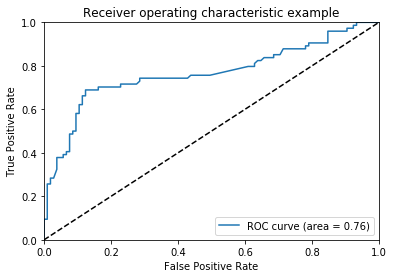

In [33]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
"""
In-class activity: Include Fare feature and fit a logistic regression. 
Calculate precision, recall and F1-score. Then plot ROC curve.
"""

'\nIn-class activity: Include Fare feature and fit a logistic regression. \nCalculate precision, recall and F1-score. Then plot ROC curve.\n'